## Kosugi and Matsushita 2020

Reproduce the self-energy and correlation energy in Fig. 6 of Kosugi and Matsushita 2020. 

In [1]:
import sys
sys.path.append('../../src/')
from greens_function import *
from ansatze import *
from hamiltonians import MolecularHamiltonian
from constants import *
import matplotlib.pyplot as plt
%matplotlib inline

/home/snsunx/.local/lib/python3.8/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


### Main Calculations

Calculate the ground state, $(N\pm 1)$-electron states and the diagonal and off-diagonal transition amplitudes.

In [2]:
# Run calculation for UCC1 ansatz
ansatz = build_kosugi_lih_ansatz(ind=1)
hamiltonian = MolecularHamiltonian(
    [['Li', (0, 0, 0)], ['H', (0, 0, 1.6)]], 'sto3g')

gf1 = GreensFunction(ansatz, hamiltonian)
gf1.run()

Start calculating the ground state using VQE
Ground state energy = -214.332 eV
Finish calculating the ground state using VQE
Start calculating e/h states
Finish calculating e/h states
Start calculating diagonal transition amplitudes
Finish calculating diagonal transition amplitudes
Start calculating off-diagonal transition amplitudes
Finish calculating off-diagonal transition amplitudes


In [3]:
# Run calculation for UCC2 ansatz
ansatz = build_kosugi_lih_ansatz(ind=2)
hamiltonian = MolecularHamiltonian(
    [['Li', (0, 0, 0)], ['H', (0, 0, 1.6)]], 'sto3g')

gf2 = GreensFunction(ansatz, hamiltonian)
gf2.run()

Start calculating the ground state using VQE
Ground state energy = -213.976 eV
Finish calculating the ground state using VQE
Start calculating e/h states
Finish calculating e/h states
Start calculating diagonal transition amplitudes
Finish calculating diagonal transition amplitudes
Start calculating off-diagonal transition amplitudes
Finish calculating off-diagonal transition amplitudes


In [4]:
# Run calculation with HOMO-LUMO Hamiltonian
ansatz = build_ne2_ansatz(4)
hamiltonian = MolecularHamiltonian(
    [['Li', (0, 0, 0)], ['H', (0, 0, 1.6)]], 'sto3g', 
    occupied_inds=[0], active_inds=[1, 2])

gf_act = GreensFunction(ansatz, hamiltonian)
gf_act.run()

Start calculating the ground state using VQE
Ground state energy = -213.939 eV
Finish calculating the ground state using VQE
Start calculating e/h states
Finish calculating e/h states
Start calculating diagonal transition amplitudes
Finish calculating diagonal transition amplitudes
Start calculating off-diagonal transition amplitudes
Finish calculating off-diagonal transition amplitudes


### Absorption Spectra

Calculate the absorption spectra. Reproduce Fig. 5.

In [5]:
omegas = np.arange(-30, 34, 0.1)
A1_list = []
A2_list = []
A_act_list = []

for omega in omegas:
    A1 = gf1.compute_spectral_function(omega + 0.02j * HARTREE_TO_EV)
    A2 = gf2.compute_spectral_function(omega + 0.02j * HARTREE_TO_EV)
    #A_act = gf_act.compute_spectral_function(omega + 0.02j * HARTREE_TO_EV)
    A1_list.append(A1)
    A2_list.append(A2)
    #A_act_list.append(A_act)

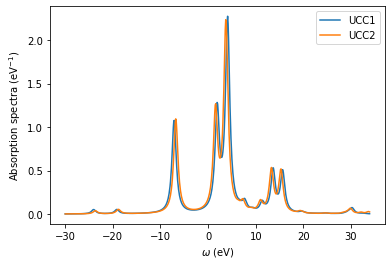

In [6]:
plt.figure()
plt.plot(omegas, A1_list, label='UCC1')
plt.plot(omegas, A2_list, label='UCC2')
#plt.plot(omega_list, A_act_list, label="HOMO-LUMO")
plt.xlabel('$\omega$ (eV)')
plt.ylabel("Absorption spectra (eV$^{-1}$)")
plt.legend()
plt.show()

### Self-energy

Reproduce the self-energy in Fig. 6.

In [7]:
omegas = np.arange(-30, 34, 0.1)
Sigmas_real = []
Sigmas_imag = []

for omega in omegas:
    Sigma = gf1.compute_self_energy(omega + 0.02j * HARTREE_TO_EV)
    Sigmas_real.append(np.trace(Sigma).real)
    Sigmas_imag.append(np.trace(Sigma).imag)

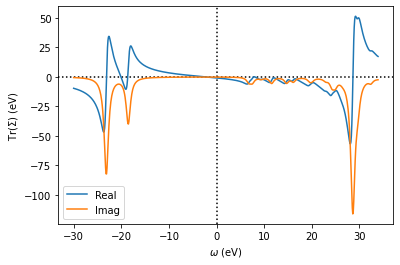

In [8]:
# Plot the trace of the self-energy
fig = plt.figure()
plt.axhline(0, color='k', ls=':')
plt.axvline(0, color='k', ls=':')
plt.plot(omegas, Sigmas_real, label='Real')
plt.plot(omegas, Sigmas_imag, label='Imag')
plt.xlabel('$\omega$ (eV)')
plt.ylabel('Tr($\Sigma$) (eV)')
plt.legend()
fig.savefig('Sigma.png', dpi=300)
#fig.savefig('Re_Sigma.png', dpi=300)
#fig.savefig('Im_Sigma.png', dpi=300)

### Correlation Energy

Reproduce the correlation energies in Fig. 6.

In [11]:
# Calculate the correlation energy using UCC1 ansatz on LiH
E1, E2 = gf1.compute_correlation_energy()

[-4.72739313e+00  1.05499676e-01  1.66961409e-01  2.43342503e-17
  2.50225217e-18 -3.46772046e-02]
[-4.72739313e+00  1.05499676e-01  1.66961409e-01  2.43342503e-17
  2.50225217e-18 -3.46772046e-02]
[ 1.05499676e-01 -1.49264622e+00  3.28928227e-02 -3.41792158e-18
 -8.57835487e-18 -5.27078787e-02]
[ 1.05499676e-01 -1.49264622e+00  3.28928227e-02 -3.41792158e-18
 -8.57835487e-18 -5.27078787e-02]
[ 1.66961409e-01  3.28928227e-02 -1.12554474e+00  1.05574660e-17
 -2.20418041e-17  3.04455720e-02]
[ 1.66961409e-01  3.28928227e-02 -1.12554474e+00  1.05574660e-17
 -2.20418041e-17  3.04455720e-02]
[ 2.43342503e-17 -3.41792158e-18  1.05574660e-17 -1.13579985e+00
 -1.11022302e-16 -1.04943922e-16]
[ 2.43342503e-17 -3.41792158e-18  1.05574660e-17 -1.13579985e+00
 -1.11022302e-16 -1.04943922e-16]
[ 2.50225217e-18 -8.57835487e-18 -2.20418041e-17 -1.38777878e-16
 -1.13579985e+00 -2.69269651e-17]
[ 2.50225217e-18 -8.57835487e-18 -2.20418041e-17 -1.38777878e-16
 -1.13579985e+00 -2.69269651e-17]
[-3.467720

In [10]:
# Print the one- and two-electron correlation energies
print(f"The one-electron correlation energy is {E1.real:.6f} eV.")
print(f"The two-electron correlation energy is {E2.real:.6f} eV.")

The one-electron correlation energy is 0.510528 eV.
The two-electron correlation energy is -0.909728 eV.


### Scratch

In [ ]:
from scipy.linalg import logm, sqrtm, expm

dim = 501
cosphi = np.diag([1] * (dim - 1), 1) / 2
cosphi += np.diag([1] * (dim - 1), -1) / 2
phi = -1j * logm(cosphi + sqrtm(cosphi @ cosphi - np.eye(dim)))

result = (expm(1j * phi) + expm(-1j * phi)) / 2
np.linalg.norm(result - cosphi)

In [ ]:
HARTREE_TO_EV

In [ ]:
gf1.molecule.one_body_integrals.shape